In [1]:
import pandas as pd

df = pd.read_excel("C2.xlsx")
df.head()

,Fasting Blood Sugar Level,BMI,HbA1c Level,Age,Family History of Diabetes,Physical Activity Level,Dietary Habits,BP_Upper value,BP_Lower value,Cholesterol Levels,Medications Used,Number of Doctor Visits,Stress Level,Hours of Sleep,Comorbidities,Geographical Location,Insurance Coverage,Lab Test Frequency,Recent Hospitalization,target
0,0.455329,-0.687004,-1.075518,0.068241,1.210823,-1.317565,-0.389490,1.044269,0.230479,-1.104719,-1.623881,1.366103,-0.414795,1.234617,-0.931359,-1.525709,-1.210823,0.109047,-1.415568,1
1,-0.237596,-0.146832,-0.089540,0.211353,1.210823,-1.070530,0.895956,-0.277051,0.299901,0.429952,-1.623881,-1.382826,0.871392,-0.134675,0.889480,-1.525709,-1.210823,1.267579,-0.702974,1
2,0.620081,-0.806347,-0.031231,-1.410586,-0.825885,-0.576458,-1.674936,-1.342631,0.994115,0.779421,1.214142,-1.153748,-0.414795,-0.512701,0.889480,0.655433,0.825885,0.398680,1.434808,1
3,1.575302,-0.313205,0.507329,0.783802,-0.825885,1.152792,-0.389490,1.555747,1.410643,0.746707,0.859389,-1.611903,0.871392,-0.768162,-1.841779,0.655433,-1.210823,0.977946,0.722214,1
4,-0.342235,-1.927280,-1.237231,1.260843,1.210823,0.658721,-1.674936,-0.149181,0.438743,-1.292612,0.149883,-1.153748,0.871392,-1.734852,-0.020940,0.655433,-1.210823,0.398680,-0.702974,1


In [17]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

X = df.drop("target", axis=1)
y = df["target"]

In [4]:
predicitions = []
actuals = []

In [6]:
for train_index, test_index in RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42).split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predicitions.extend(y_pred)
    actuals.extend(y_test)

In [20]:
y_probs = cross_val_predict(
    model,
    X, 
    y,
    cv=StratifiedKFold(n_splits=15, random_state=42, shuffle=True),
    method="predict_proba"
)[:, -1]

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, y_probs)

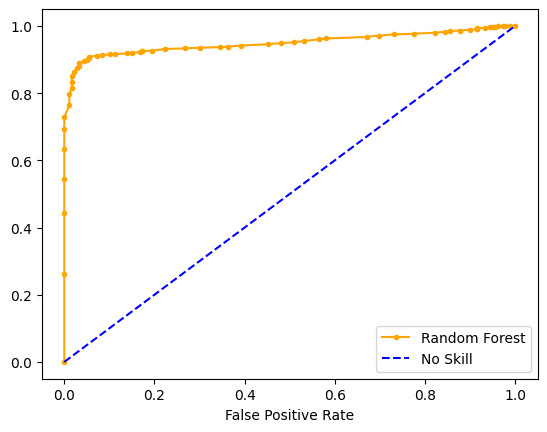

In [27]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, marker='.', color='orange')
plt.xlabel("False Positive Rate")

plt.plot([0, 1], [0, 1], linestyle='--', color='blue')
plt.legend(["Random Forest", "No Skill"])